In [66]:
#Importing relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import icd
import seaborn as sns
import seaborn
from venny4py.venny4py import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
from prince import MCA


In [2]:
#Loading the UK Biobank data
sample_df = pd.read_csv("C:/Users/Aakanksha Choudhary/OneDrive/Desktop/project/leu.tsv", sep='\t', header=0, low_memory= 'False')
inferred_dtypes = sample_df.dtypes
dtype_dict = {}
for col, dtype in inferred_dtypes.items():
    dtype_dict[col] = dtype.name
df = pd.read_csv("C:/Users/Aakanksha Choudhary/OneDrive/Desktop/project/leu.tsv", sep='\t', dtype=dtype_dict, engine='python')


C:\Users\Aakanksha Choudhary\AppData\Local\Temp\ipykernel_37220\50388838.py:2: DtypeWarning: Columns (19,20,21,23,24,25,29,30,31,98,99,100,106,107,108,110,111,451,453,454,478,479,735,736,737,739,740,741,751,752,753,755,756,757,775,776,777,779,780,781,783,784,785,814,815,816,818,819,820,822,823,824,826,827,828,829,830,831,833,834,835,838,839,840,842,843,844,846,847,848,870,871,872,874,875,876,878,879,880,882,883,884,886,887,888,890,891,892,898,899,900,902,903,904,906,907,908,910,911,912,914,915,916,918,919,920,922,923,924,926,927,928,930,931,932,958,959,960,962,963,964,966,967,968,970,971,972,974,975,976,978,979,980,982,983,984,986,987,988,990,991,992,994,995,996,1002,1003,1004,1010,1011,1012,1014,1015,1016,1026,1027,1028,1030,1031,1032,1038,1039,1040,1042,1043,1044,1046,1047,1048,1070,1071,1072,1074,1075,1076,1078,1079,1081,1082,1084,1085,1087,1088,1090,1091,1093,1094,1096,1097,1102,1103,1105,1106,1107,1109,1110,1111,1113,1114,1116,1117,1119,1120,1121,1127,1128,1129,1143,1144,1145,1147

In [9]:
icd_columns= df.columns[df.columns.str.contains('f41270_0')]
icd_df= df[['eid'] + list(icd_columns)]
icd_df

,eid,diagnoses_icd10_f41270_0_0,diagnoses_icd10_f41270_0_1,diagnoses_icd10_f41270_0_2,diagnoses_icd10_f41270_0_3,diagnoses_icd10_f41270_0_4,diagnoses_icd10_f41270_0_5,diagnoses_icd10_f41270_0_6,diagnoses_icd10_f41270_0_7,diagnoses_icd10_f41270_0_8,...,diagnoses_icd10_f41270_0_213,diagnoses_icd10_f41270_0_214,diagnoses_icd10_f41270_0_215,diagnoses_icd10_f41270_0_216,diagnoses_icd10_f41270_0_217,diagnoses_icd10_f41270_0_218,diagnoses_icd10_f41270_0_219,diagnoses_icd10_f41270_0_220,diagnoses_icd10_f41270_0_221,diagnoses_icd10_f41270_0_222
0,1002912,C819,C920,D45,D471,E538,E831,I219,I269,I802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002951,A499,B029,C829,C859,C900,C911,D509,D70,D801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1005217,C921,E119,K562,K573,M109,M189,M202,M2577,R195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1009538,C64,C911,I849,K610,S208,V496,Z511,Z855,Z905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1009715,A047,A099,A419,C920,C931,D121,D123,D70,F171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6006271,A419,C920,D70,E119,E780,E875,F059,G629,I10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2145,6018053,C911,D693,D695,D801,K011,R51,Z857,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2146,6020766,C508,C921,D509,D649,E86,E871,E875,F329,G439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147,6024287,B972,C444,C911,H024,H269,H402,H409,H521,J128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
icd_columns

Index(['diagnoses_icd10_f41270_0_0', 'diagnoses_icd10_f41270_0_1',
       'diagnoses_icd10_f41270_0_2', 'diagnoses_icd10_f41270_0_3',
       'diagnoses_icd10_f41270_0_4', 'diagnoses_icd10_f41270_0_5',
       'diagnoses_icd10_f41270_0_6', 'diagnoses_icd10_f41270_0_7',
       'diagnoses_icd10_f41270_0_8', 'diagnoses_icd10_f41270_0_9',
       ...
       'diagnoses_icd10_f41270_0_213', 'diagnoses_icd10_f41270_0_214',
       'diagnoses_icd10_f41270_0_215', 'diagnoses_icd10_f41270_0_216',
       'diagnoses_icd10_f41270_0_217', 'diagnoses_icd10_f41270_0_218',
       'diagnoses_icd10_f41270_0_219', 'diagnoses_icd10_f41270_0_220',
       'diagnoses_icd10_f41270_0_221', 'diagnoses_icd10_f41270_0_222'],
      dtype='object', length=223)

In [11]:
dob_df= df[df.columns[df.columns.str.contains('f34_0')]]
dob_df

,year_of_birth_f34_0_0
0,1947
1,1944
2,1949
3,1945
4,1954
...,...
2144,1947
2145,1943
2146,1944
2147,1948


In [12]:
imd_df= df[df.columns[df.columns.str.contains('f26410')]]
imd_df

,index_of_multiple_deprivation_england_f26410_0_0
0,NaN
1,NaN
2,10.35
3,NaN
4,NaN
...,...
2144,60.84
2145,18.46
2146,9.27
2147,NaN


In [13]:
type_cancer_columns= df.columns[df.columns.str.contains('f40006')]
type_cancer_df= df[['eid'] + list(type_cancer_columns)]
type_cancer_df

,eid,type_of_cancer_icd10_f40006_0_0,type_of_cancer_icd10_f40006_1_0,type_of_cancer_icd10_f40006_2_0,type_of_cancer_icd10_f40006_3_0,type_of_cancer_icd10_f40006_4_0,type_of_cancer_icd10_f40006_5_0,type_of_cancer_icd10_f40006_6_0,type_of_cancer_icd10_f40006_7_0,type_of_cancer_icd10_f40006_8_0,type_of_cancer_icd10_f40006_9_0,type_of_cancer_icd10_f40006_10_0,type_of_cancer_icd10_f40006_11_0,type_of_cancer_icd10_f40006_12_0,type_of_cancer_icd10_f40006_13_0,type_of_cancer_icd10_f40006_14_0,type_of_cancer_icd10_f40006_15_0,type_of_cancer_icd10_f40006_16_0
0,1002912,C445,C447,C920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002951,C911,C449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1005217,C921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1009538,C64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1009715,C927,C925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6006271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2145,6018053,C911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2146,6020766,NaN,NaN,NaN,NaN,C441,C501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147,6024287,C911,C444,C449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
date_of_cancer_df= df[df.columns[df.columns.str.contains('f40008')]]
date_of_cancer_df

,age_at_cancer_diagnosis_f40008_0_0,age_at_cancer_diagnosis_f40008_1_0,age_at_cancer_diagnosis_f40008_2_0,age_at_cancer_diagnosis_f40008_3_0,age_at_cancer_diagnosis_f40008_4_0,age_at_cancer_diagnosis_f40008_5_0,age_at_cancer_diagnosis_f40008_6_0,age_at_cancer_diagnosis_f40008_7_0,age_at_cancer_diagnosis_f40008_8_0,age_at_cancer_diagnosis_f40008_9_0,age_at_cancer_diagnosis_f40008_10_0,age_at_cancer_diagnosis_f40008_11_0,age_at_cancer_diagnosis_f40008_12_0,age_at_cancer_diagnosis_f40008_13_0,age_at_cancer_diagnosis_f40008_14_0,age_at_cancer_diagnosis_f40008_15_0,age_at_cancer_diagnosis_f40008_16_0
0,55.2,62.0,62.1,41.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53.5,62.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58.9,59.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2145,72.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2146,41.5,43.9,41.5,43.9,67.0,69.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147,63.8,63.8,65.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
death_age_columns = df[df.columns[df.columns.str.contains('f40007_0')]]
primary_columns = df[df.columns[df.columns.str.contains('f40001_0')]]
secondary_columns = df[df.columns[df.columns.str.contains('f40002_0')]]

# Combining the filtered columns into one DataFrame
death_df = pd.concat([death_age_columns, primary_columns, secondary_columns], axis=1)
death_df

,age_at_death_f40007_0_0,underlying_primary_cause_of_death_icd10_f40001_0_0,contributory_secondary_ca_f40002_0_1,contributory_secondary_ca_f40002_0_2,contributory_secondary_ca_f40002_0_3,contributory_secondary_ca_f40002_0_4,contributory_secondary_ca_f40002_0_5,contributory_secondary_ca_f40002_0_6,contributory_secondary_ca_f40002_0_7,contributory_secondary_ca_f40002_0_8,contributory_secondary_ca_f40002_0_9,contributory_secondary_ca_f40002_0_10,contributory_secondary_ca_f40002_0_11,contributory_secondary_ca_f40002_0_12,contributory_secondary_ca_f40002_0_13,contributory_secondary_ca_f40002_0_14
0,62.4,C920,A419,D45,I219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60.0,C920,J81,T860,Y848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,70.5,C920,J189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2146,75.2,K746,K922,I859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
sex_df= df[df.columns[df.columns.str.contains('f31_0')]]
sex_df

,sex_f31_0_0
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
2144,Male
2145,Female
2146,Female
2147,Male


In [19]:
#Dictionary to store the ICD-10 codes associated with each leukaemia sub-type
leukemia_dict= {
    'AML': 'C920',
    'CML': 'C910',
    'ALL': 'C911',
    'CLL': 'C921',
    'ML': ['C92', 'C920', 'C920', 'C921', 'C922', 'C923', 'C924', 'C925', 'C926', 'C927', 'C928', 'C929'],
    'LL':  ['C91', 'C910', 'C910', 'C911', 'C912', 'C913', 'C914', 'C915', 'C916', 'C917', 'C918', 'C919'],
    'Acute': ['C920', 'C910'],
    'Chronic': ['C921', 'C911']}

Creating a function to determine the leukaemia sub-type each patient belongs to.

In [20]:
def determine_leukemia_types(row, leukemia_dict):
    result= {}
    #Iterating over the leukaemia dict
    for leukemia_type, icd_codes in leukemia_dict.items():
        #If single icd code
        if isinstance(icd_codes, str):
            result[leukemia_type]= icd_codes in str(row.values)
        #If multiple icd codes associated with the leukaemia type, returns true whenever any of the icd codes is found
        elif isinstance(icd_codes, list):
            found= False
            for icd_code in icd_codes:
                if icd_code in str(row.values):
                    found= True
                    break
            result[leukemia_type]= found
    return result

In [21]:
#Applying the determine leukaemia types function and converting the resulting dictionary into a data frame
leukemia_types_list = []
for _, row in icd_df.iterrows():
    leukemia_types_list.append(determine_leukemia_types(row, leukemia_dict))
leukemia_types_df = pd.DataFrame(leukemia_types_list)

icd_df = pd.concat([icd_df, leukemia_types_df], axis=1)

In [22]:
icd_df

,eid,diagnoses_icd10_f41270_0_0,diagnoses_icd10_f41270_0_1,diagnoses_icd10_f41270_0_2,diagnoses_icd10_f41270_0_3,diagnoses_icd10_f41270_0_4,diagnoses_icd10_f41270_0_5,diagnoses_icd10_f41270_0_6,diagnoses_icd10_f41270_0_7,diagnoses_icd10_f41270_0_8,...,diagnoses_icd10_f41270_0_221,diagnoses_icd10_f41270_0_222,AML,CML,ALL,CLL,ML,LL,Acute,Chronic
0,1002912,C819,C920,D45,D471,E538,E831,I219,I269,I802,...,NaN,NaN,True,False,False,False,True,False,True,False
1,1002951,A499,B029,C829,C859,C900,C911,D509,D70,D801,...,NaN,NaN,False,False,True,False,False,True,False,True
2,1005217,C921,E119,K562,K573,M109,M189,M202,M2577,R195,...,NaN,NaN,False,False,False,True,True,False,False,True
3,1009538,C64,C911,I849,K610,S208,V496,Z511,Z855,Z905,...,NaN,NaN,False,False,True,False,False,True,False,True
4,1009715,A047,A099,A419,C920,C931,D121,D123,D70,F171,...,NaN,NaN,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6006271,A419,C920,D70,E119,E780,E875,F059,G629,I10,...,NaN,NaN,True,False,False,False,True,False,True,False
2145,6018053,C911,D693,D695,D801,K011,R51,Z857,NaN,NaN,...,NaN,NaN,False,False,True,False,False,True,False,True
2146,6020766,C508,C921,D509,D649,E86,E871,E875,F329,G439,...,NaN,NaN,False,False,False,True,True,False,False,True
2147,6024287,B972,C444,C911,H024,H269,H402,H409,H521,J128,...,NaN,NaN,False,False,True,False,False,True,False,True


In [23]:
leuk_df=leukemia_types_df.drop(columns=['ML'])
leuk_df=leuk_df.drop(columns=['Acute'])
leuk_df=leuk_df.drop(columns=['Chronic'])
leuk_df=leuk_df.drop(columns=['LL'])
leuk_df

,AML,CML,ALL,CLL
0,True,False,False,False
1,False,False,True,False
2,False,False,False,True
3,False,False,True,False
4,True,False,False,False
...,...,...,...,...
2144,True,False,False,False
2145,False,False,True,False
2146,False,False,False,True
2147,False,False,True,False


In [24]:
aml_count= (leukemia_types_df['AML']== True).sum()
cml_count= (leukemia_types_df['CML']== True).sum()
cll_count= (leukemia_types_df['CLL']== True).sum()
all_count= (leukemia_types_df['ALL']== True).sum()

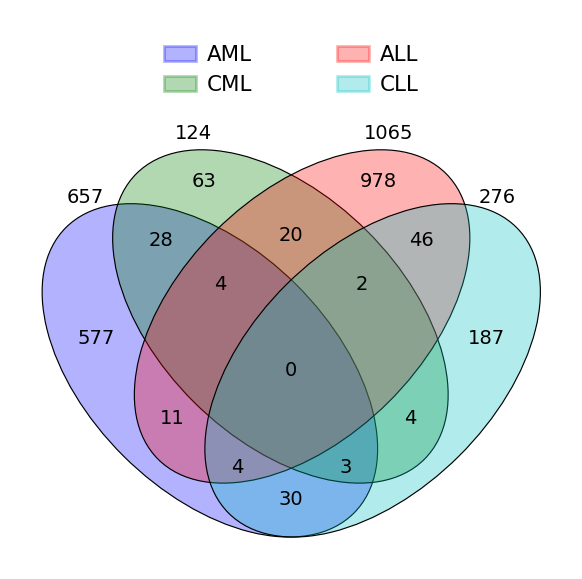

In [62]:
#Creating a dictionary with all four leukaemia types as keys
categories = {}
for col in leuk_df.columns:
    #Assigning an empty set as a value to the category in the dictionary
    categories[col] = set()
for index, row in leuk_df.iterrows():
    #If true for the current patient, adding the patiend eid to the set
    for col in leuk_df.columns:
        if row[col]:  
            categories[col].add(index)

venny4py(categories)

Extracting the patient eids exclusive for one of the four leukaemia sub-types (ALL, AML, CML and CLL)

In [31]:
exc_dict = {'AML': [], 'ALL': [], 'CML': [], 'CLL': [], 'Other':[]}
for index, row in leuk_df.iterrows():
    if row['AML'] and not (row['ALL'] or row['CML'] or row['CLL']):
        exc_dict['AML'].append(index)
    if row['ALL'] and not (row['AML'] or row['CML'] or row['CLL']):
        exc_dict['ALL'].append(index)
    if row['CML'] and not (row['AML'] or row['ALL'] or row['CLL']):
        exc_dict['CML'].append(index)
    if row['CLL'] and not (row['AML'] or row['ALL'] or row['CML']):
        exc_dict['CLL'].append(index)
   

In [33]:
#Creating a data frame which consists of columns named after leukaemia sub-types and boolean values to indicate the presence or absence of each subtype
subset_dfs = []
for leukemia_type, indices in exc_dict.items():
    leukemia_indices = indices
    subset_dfs.append(leuk_df.loc[leukemia_indices])

subset_df = pd.concat(subset_dfs)

subset_df

,AML,CML,ALL,CLL
0,True,False,False,False
4,True,False,False,False
5,True,False,False,False
8,True,False,False,False
10,True,False,False,False
...,...,...,...,...
2093,False,False,False,True
2128,False,False,False,True
2130,False,False,False,True
2131,False,False,False,True


Creating 16 lists, each corresponding to a first occurrence chapter in the UK Biobank data. The values in the list are the icd codes associated with each chapter or broad disease classification. Then storing this information in a dictionary to use it as a custom mapping parameter while treating the first occurrence chapters as pseudo-comorbidities. 

In [64]:
'''Rationale:
    This code snippet generates a list of potential codes by iterating over combinations of letters and numbers. 
    The process is driven by the structure of codes associated with particular first occurrence chapters, as derived from the UK Biobank web interface. 
    The approach is systematic and ensures that all possible combinations within a specified format are captured'''

inf_para_codes = []
#iterates over the string "AB", meaning the code will start with either the letter 'A' or 'B'. 
#These letters are associated with specific first occurrence chapters in the dataset.

for letter in "AB":
    #For each letter, the inner loop iterates over a range of numbers from 0 to 99. 
    #The number is formatted as a two-digit string using f"{i:02d}", which ensures that single-digit numbers are padded with a leading zero (e.g., 01, 02, etc.). 
    #The combination of the letter and the two-digit number forms the base code (e.g., A00, A01, ..., B99).
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        inf_para_codes.append(base_code)
        #For each base code, another loop iterates over a range of digits from 0 to 9. 
        #This step appends each digit to the base code, creating a more detailed code (e.g., A000, A001, ..., B999). 
        #These extended codes are also appended to the inf_para_codes list.
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            inf_para_codes.append(new_code)  

blood_codes=[]
for letter in "D":
    for i in range(50, 90):
        base_code = f"{letter}{i:02d}"
        blood_codes.append(base_code) 
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            blood_codes.append(new_code)  

endocrine_codes=[]
for letter in "E":
    for i in range(91):
        base_code = f"{letter}{i:02d}"
        endocrine_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            endocrine_codes.append(new_code)  

mental_codes=[]
for letter in "F":
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        mental_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            mental_codes.append(new_code)  

nervous_codes=[]
for letter in "G":
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        nervous_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            nervous_codes.append(new_code)  


eye_codes=[]
for letter in "H":
    for i in range(60):
        base_code = f"{letter}{i:02d}"
        eye_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            eye_codes.append(new_code) 

ear_codes=[]
for letter in "H":
    for i in range(60, 96):
        base_code = f"{letter}{i:02d}"
        ear_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            ear_codes.append(new_code) 

circ_codes=[]
for letter in "I":
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        circ_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            circ_codes.append(new_code) 

resp_codes=[]
for letter in "J":
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        resp_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            resp_codes.append(new_code) 

digestive_codes=[]
for letter in "K":
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        digestive_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            digestive_codes.append(new_code)

skin_codes=[]
for letter in "L":
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        skin_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            skin_codes.append(new_code)

muscle_codes=[]
for letter in "M":
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        muscle_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            muscle_codes.append(new_code)

genitourino_codes=[]
for letter in "N":
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        genitourino_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            genitourino_codes.append(new_code)

pregnancy_codes=[]
for letter in "O":
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        pregnancy_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            pregnancy_codes.append(new_code)

perinatal_codes=[]
for letter in "P":
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        perinatal_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            perinatal_codes.append(new_code)

congenital_codes=[]
for letter in "Q":
    for i in range(100):
        base_code = f"{letter}{i:02d}"
        congenital_codes.append(base_code)
        for digit in range(10):
            new_code = f"{base_code}{digit}"
            congenital_codes.append(new_code)



In [65]:
codes_dict = {
    "inf_para_codes": inf_para_codes,
    "blood_codes": blood_codes,
    "endocrine_codes": endocrine_codes,
    "mental_codes": mental_codes,
    "nervous_codes": nervous_codes,
    "eye_codes": eye_codes,
    "ear_codes": ear_codes,
    "circ_codes": circ_codes,
    "resp_codes": resp_codes,
    "digestive_codes": digestive_codes,
    "skin_codes": skin_codes,
    "muscle_codes": muscle_codes,
    "genitourino_codes": genitourino_codes,
    "pregnancy_codes": pregnancy_codes,
    "perinatal_codes": perinatal_codes,
    "congenital_codes": congenital_codes,
}

In [37]:
#Replacing NA values with an empty string
icd_df[icd_columns]= icd_df[icd_columns].fillna('').astype(str)

In [ ]:
#Mapping the summary diagnosis icd codes for each patient to the associated first occurrence chapter
first_occur= icd.icd_to_comorbidities(icd_df, 'eid', icd_columns, mapping= codes_dict)

In [38]:
first_occur= pd.read_csv("C:/Users/Aakanksha Choudhary/OneDrive/Desktop/project/comor3.csv.xls", sep= ',', header=0)

In [39]:
icd_df= icd_df.set_index('eid')

In [40]:
first_occur['eid']= icd_df.index

In [41]:
first_occur= first_occur.set_index('eid')

In [42]:
first_occur= first_occur.merge(icd_df[['AML', 'ALL', 'CLL', 'CML']], left_index= True, right_index= True)

In [43]:
sex_df= df[df.columns[df.columns.str.contains('f31_0')]]
sex_df['eid']= first_occur.index
imd_df= df[df.columns[df.columns.str.contains('f26410')]]
imd_df['eid']= first_occur.index
death_df= df[df.columns[df.columns.str.contains('f40007_0')]]
death_df['eid']= first_occur.index

C:\Users\Aakanksha Choudhary\AppData\Local\Temp\ipykernel_37220\19202876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_df['eid']= first_occur.index
C:\Users\Aakanksha Choudhary\AppData\Local\Temp\ipykernel_37220\19202876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imd_df['eid']= first_occur.index
C:\Users\Aakanksha Choudhary\AppData\Local\Temp\ipykernel_37220\19202876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [44]:
first_occur= first_occur.merge(sex_df[['eid', 'sex_f31_0_0']], left_index= True, right_on= 'eid')

In [45]:
first_occur= first_occur.set_index('eid')

In [46]:
first_occur= first_occur.merge(imd_df[['eid', 'index_of_multiple_deprivation_england_f26410_0_0']], left_index=True, right_on= 'eid')

In [47]:
first_occur= first_occur.set_index('eid')

In [48]:
first_occur= first_occur.merge(death_df[['eid', 'age_at_death_f40007_0_0']], left_index=True, right_on= 'eid')

In [49]:
first_occur= first_occur.set_index('eid')

In [50]:
columns_to_map = first_occur.iloc[:, 0:16].columns
for column in columns_to_map:
    first_occur[column] = first_occur[column].map({True: 1, False: 0})

In [51]:
first_occur['sex_f31_0_0']= first_occur['sex_f31_0_0'].map({'Male':0, 'Female':1})

In [52]:
first_occur

,inf_para_codes,blood_codes,endocrine_codes,mental_codes,nervous_codes,eye_codes,ear_codes,circ_codes,resp_codes,digestive_codes,...,pregnancy_codes,perinatal_codes,congenital_codes,AML,ALL,CLL,CML,sex_f31_0_0,index_of_multiple_deprivation_england_f26410_0_0,age_at_death_f40007_0_0
eid,,,,,,,,,,,,,,,,,,,,,
1002912,0,0,1,0,0,0,0,1,1,1,...,0,0,0,True,False,False,False,0,NaN,62.4
1002951,1,1,1,0,0,0,0,1,1,1,...,0,0,0,False,True,False,False,0,NaN,NaN
1005217,0,0,1,0,0,0,0,0,0,1,...,0,0,0,False,False,True,False,0,10.35,NaN
1009538,0,0,0,0,0,0,0,1,0,1,...,0,0,0,False,True,False,False,0,NaN,NaN
1009715,1,1,0,1,0,0,1,0,1,1,...,0,0,0,True,False,False,False,0,NaN,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006271,1,1,1,1,1,0,0,1,1,0,...,0,0,0,True,False,False,False,0,60.84,70.5
6018053,0,1,0,0,0,0,0,0,0,1,...,0,0,0,False,True,False,False,1,18.46,NaN
6020766,0,1,1,1,1,1,0,1,1,1,...,0,0,0,False,False,True,False,1,9.27,75.2


[18.973925552513027, 7.939152392785072, 6.639537053588043, 6.436124548494135, 6.24593297436504, 6.081287851531762, 5.785254283006509, 5.573795206297554, 5.360690049666708, 5.252906620155059, 5.144720947165325, 4.856313130565084, 4.75022508677506, 4.070855594680808, 3.80119617392306, 3.088082534487498]


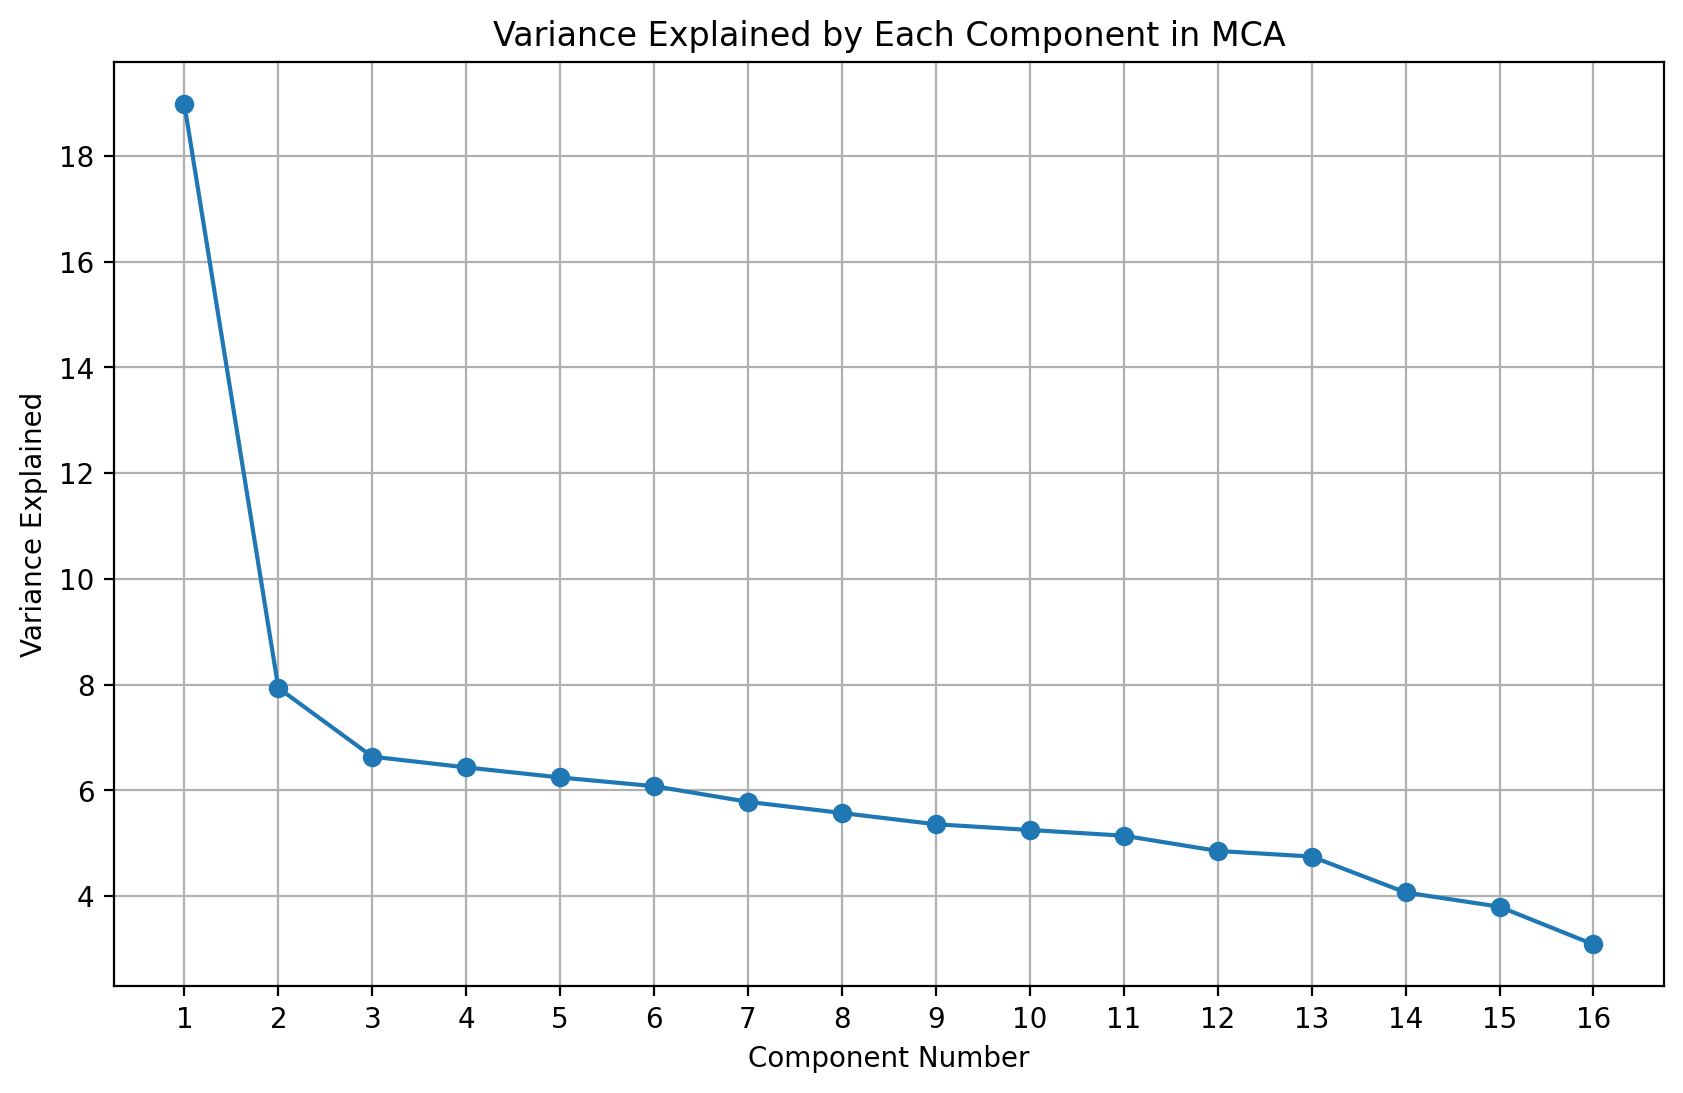

In [53]:
comor_columns= first_occur.columns[0:16]
n_components_range = range(1, 17)  
cumulative_explained_variances = []

for n_components in n_components_range:
    mca = MCA(n_components=n_components)
    mca.fit(first_occur[comor_columns])
    cumulative_explained_variances.append(sum(mca.percentage_of_variance_))

explained_variances = [cumulative_explained_variances[0]]  
for i in range(1, len(cumulative_explained_variances)):
    explained_variances.append(cumulative_explained_variances[i] - cumulative_explained_variances[i-1])

print(explained_variances)
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variances, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Component in MCA')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()

In [54]:
coordinates = mca.transform(first_occur[comor_columns])
first_occur['PC1'] = coordinates.iloc[:, 0]
first_occur['PC2'] = coordinates.iloc[:, 1]
first_occur['PC3'] = coordinates.iloc[:, 2]
first_occur['PC4'] = coordinates.iloc[:, 3]

In [55]:
coordinates

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
eid,,,,,,,,,,,,,,,,
1002912,-0.033542,0.144711,-0.023199,0.220819,-0.207899,0.163986,-0.261842,0.199203,0.337155,-0.259703,0.221129,0.033428,-0.076892,0.297215,0.205688,0.006772
1002951,0.223839,-0.451545,-0.064667,0.091672,-0.259739,0.000474,0.222659,-0.196444,-0.035699,0.087083,-0.070954,-0.053926,-0.081450,0.063237,0.054234,0.023823
1005217,-0.493836,0.224800,0.016885,0.123119,-0.136099,0.082924,-0.077003,-0.061079,0.167000,-0.234810,-0.082154,0.074048,0.234633,-0.152996,0.480092,0.084287
1009538,-0.629099,0.058471,-0.010741,0.078234,-0.171916,0.113994,0.028888,-0.119774,0.107173,-0.215347,-0.135427,0.049282,-0.321044,0.005295,-0.163484,0.088985
1009715,0.250988,-0.200658,-0.076467,-0.393521,0.768194,-0.232279,-0.021946,-0.356630,0.345112,-0.012112,-0.135595,-0.459696,-0.036336,0.094477,-0.037109,-0.095343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006271,0.302889,0.037135,-0.024292,0.146467,-0.008847,-0.452116,0.118691,-0.278050,-0.313392,0.601500,0.243407,-0.083259,-0.137198,-0.027360,-0.097479,0.010181
6018053,-0.626185,-0.212152,0.019349,-0.072700,0.117272,-0.043101,-0.011239,-0.165408,-0.085306,-0.261846,-0.170977,0.021439,-0.123688,-0.254974,0.158621,-0.251200
6020766,0.621743,0.545730,-0.008496,0.075483,0.030713,-0.170896,-0.085043,0.243702,-0.249851,-0.024857,-0.049780,-0.118195,-0.119575,0.087187,0.041835,-0.363328


Plotting each combination of components explaining the maximum variation.

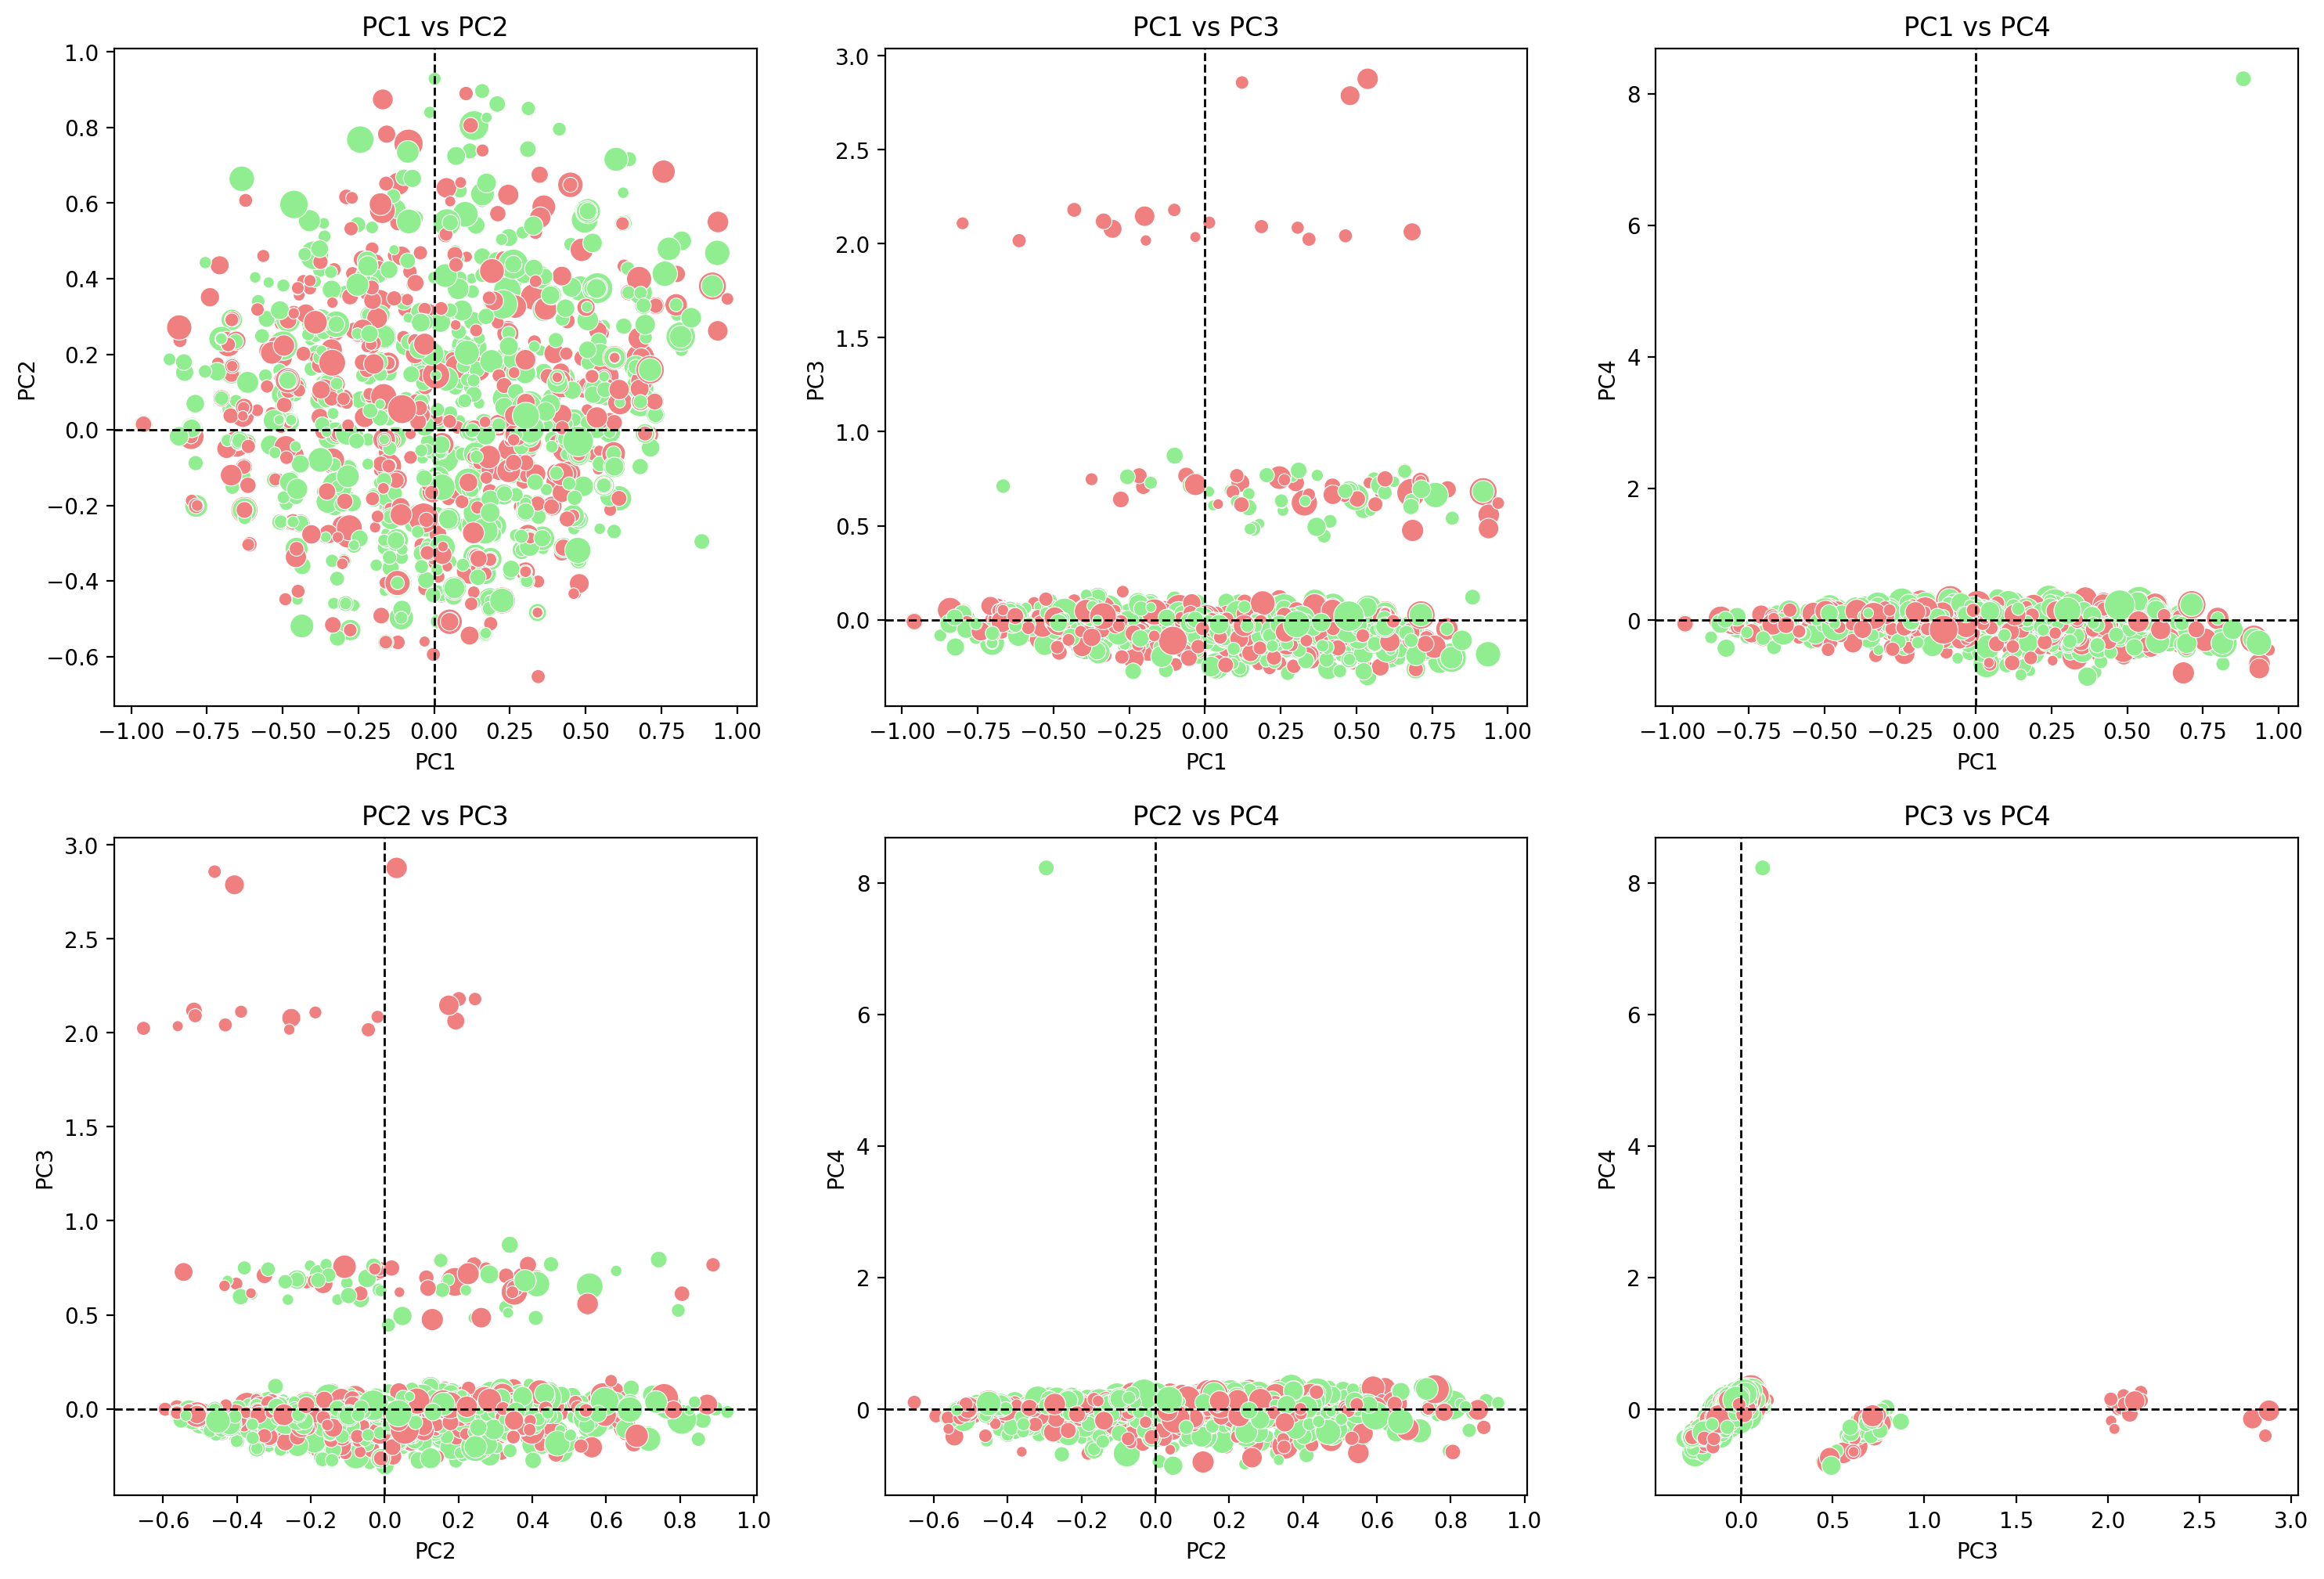

In [61]:
fig, axs= plt.subplots(2, 3, figsize= (18, 12))
plot_pairs= [
    ('PC1', 'PC2'),
    ('PC1', 'PC3'),
    ('PC1', 'PC4'),
    ('PC2', 'PC3'),
    ('PC2', 'PC4'),
    ('PC3', 'PC4')
]

titles = [
    'PC1 vs PC2',
    'PC1 vs PC3',
    'PC1 vs PC4',
    'PC2 vs PC3',
    'PC2 vs PC4',
    'PC3 vs PC4'
]

#Colouring the data points by sex and varying the size by the IMD score
for ax, (x, y), title in zip(axs.flat, plot_pairs, titles):
    sns.scatterplot(
        data=first_occur,
        x=x,
        y=y,
        hue='sex_f31_0_0',
        size='index_of_multiple_deprivation_england_f26410_0_0',
        sizes=(20, 200),
        palette={0: 'lightgreen', 1: 'lightcoral'},
        ax=ax,
        legend=False  
    )
    ax.set_title(title)
    ax.axhline(0, linestyle='--', color='black', linewidth=1)
    ax.axvline(0, linestyle='--', color='black', linewidth=1)


Creating 3D plots for each combination of the principal components to visualise seperation of data points based on the comorbidity profiles along 3 axes.

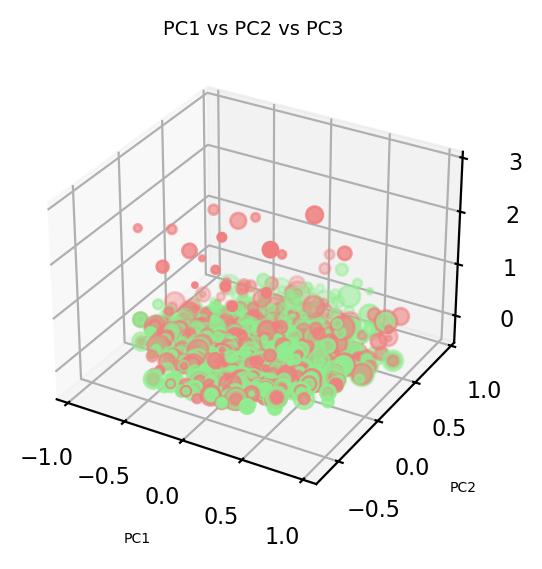

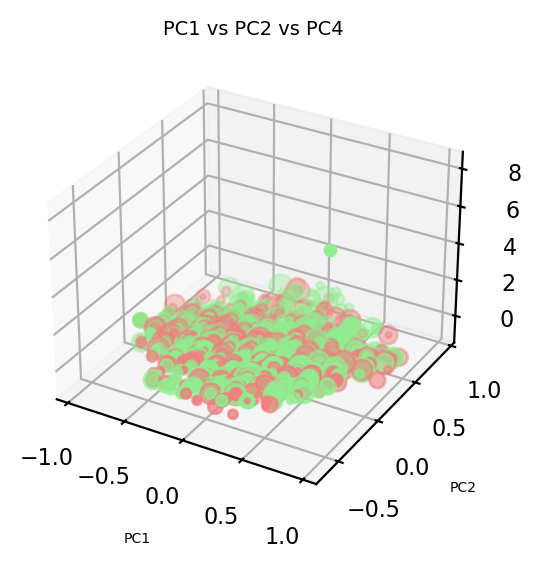

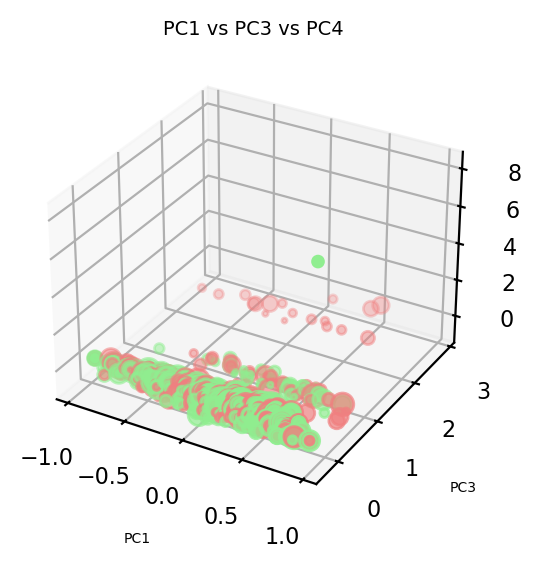

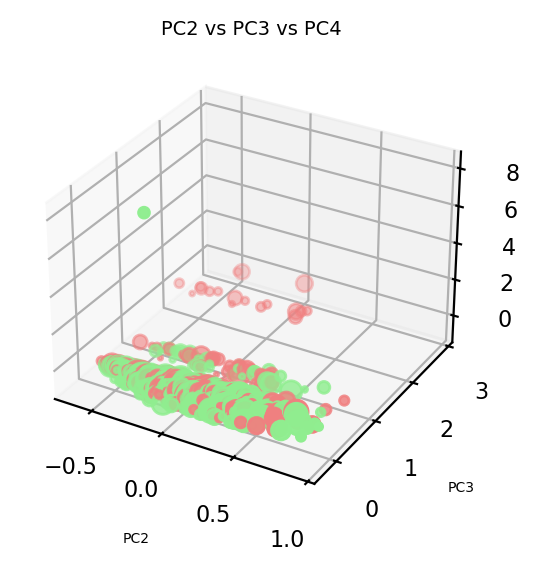

In [59]:
plot_triplets = [
    ('PC1', 'PC2', 'PC3'),
    ('PC1', 'PC2', 'PC4'),
    ('PC1', 'PC3', 'PC4'),
    ('PC2', 'PC3', 'PC4')
]

titles = [
    'PC1 vs PC2 vs PC3',
    'PC1 vs PC2 vs PC4',
    'PC1 vs PC3 vs PC4',
    'PC2 vs PC3 vs PC4'
]

for (x, y, z), title in zip(plot_triplets, titles):
    fig = plt.figure(figsize=(4, 3))  
    ax = fig.add_subplot(111, projection='3d')
    xs = first_occur[x]
    ys = first_occur[y]
    zs = first_occur[z]

    color = first_occur['sex_f31_0_0'].map({0: 'lightgreen', 1: 'lightcoral'})
    scatter = ax.scatter(xs, ys, zs, c=color, s=first_occur.index_of_multiple_deprivation_england_f26410_0_0)

   # Adding labels and title with smaller fontsize
    ax.set_xlabel(x, fontsize=5)
    ax.set_ylabel(y, fontsize=5)
    ax.set_zlabel(z, fontsize=5)
    ax.set_title(title, fontsize=7)

    # Decreasing the size of tick labels
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='z', which='major', labelsize=8)
    plt.show()



Creating a biplot with confidence ellipses for ALL, CLL, CML and AML. 

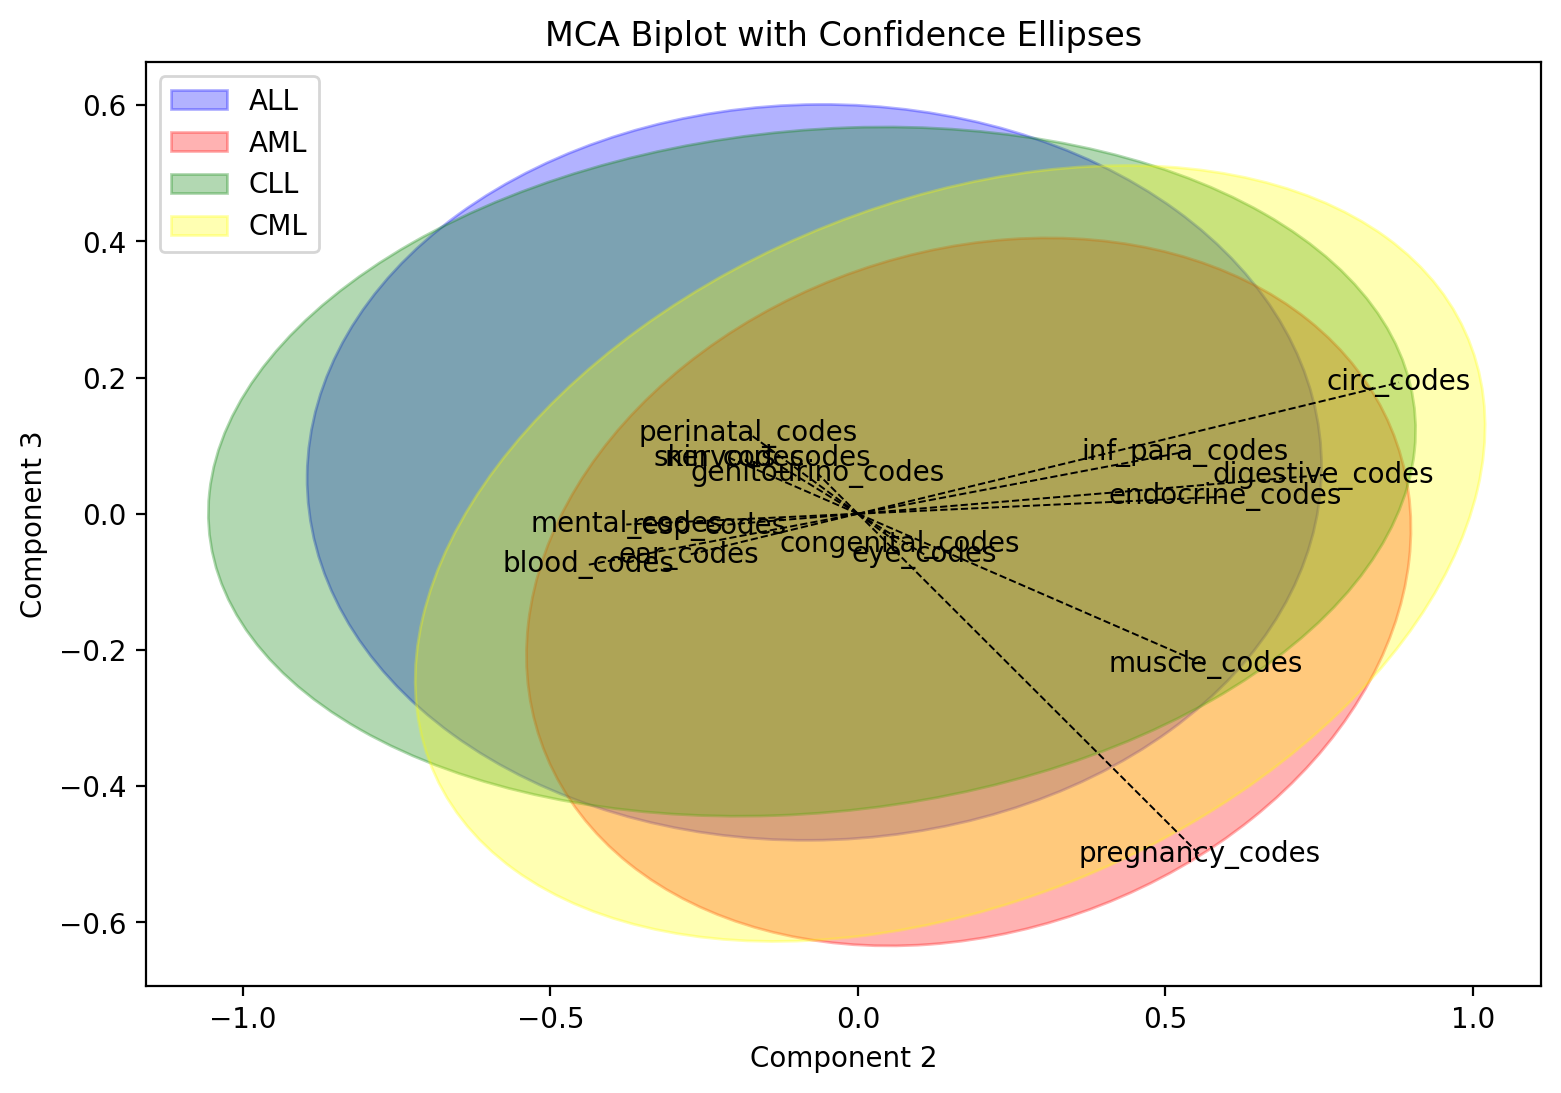

In [67]:

color_dict = {'ALL': 'blue', 'AML': 'red', 'CLL': 'green', 'CML': 'yellow'}

def confidence_ellipse(mean, cov, ax, n_std=1.96, **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *mean* and *cov*.
    """
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, **kwargs)
    
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = mean[0]
    
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = mean[1]
    
    transf = (
        plt.matplotlib.transforms.Affine2D()
        .rotate_deg(45)
        .scale(scale_x, scale_y)
        .translate(mean_x, mean_y)
    )
    
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

mca = MCA(n_components=4, random_state=42)
mca = mca.fit(first_occur[comor_columns])

row_coords = mca.row_coordinates(first_occur)

col_coords = mca.column_coordinates(first_occur)

plt.figure(figsize=(9, 6))

ax = plt.gca()

for category, color in color_dict.items():
    if category in first_occur.columns:
        indices = first_occur.index[first_occur[category] == True]
        category_coordinates = row_coords.loc[indices]
        
        mean = category_coordinates.mean(axis=0)
        cov = np.cov(category_coordinates.T)
        
        confidence_ellipse(mean, cov, ax, edgecolor=color, facecolor=color, alpha=0.3, label=category)

for i, (x, y) in enumerate(zip(col_coords.iloc[:, 1], col_coords.iloc[:, 2])):
    if i < len(first_occur[comor_columns].columns):
        plt.text(x, y, first_occur[comor_columns].columns[i], color='black', ha='center', va='center')
        #plt.scatter(x, y, c='black', marker='x')
        plt.plot([0, x], [0, y], color='black', linestyle='--', linewidth=0.7)  
plt.xlabel('Component 2')
plt.ylabel('Component 3')
plt.title('MCA Biplot with Confidence Ellipses')

plt.legend()

plt.show()
